In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

### Relatiivne viga

\begin{equation*}
    \text{"relatiivne viga"} = \frac{ v_{saadud} - v_{oodatud} }{ v_{oodatud} } = \frac{ v_{saadud} }{ v_{oodatud} } - 1
\end{equation*}

Olgu $A$ ja $B$ mudelid ning nende ennustused märgendi $y_i$ puhul vastavalt $\hat{y}_i$ ja $\hat{z}_i$

$\dots$

\begin{align*}
    \Delta & := p_A - p_B \\
           & = \frac{ 1 }{ n } \sum_{ i = 1 }^{ n } [\hat{y}_i = y_i] - \frac{ 1 }{ n } \sum_{ i = 1 }^{ n } [\hat{z}_i = y_i] \\
           & = \frac{ 1 }{ n } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] \\
           & = \frac{ k }{ n } \frac{ 1 }{ k } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] \\
\end{align*}

millest $\frac{ 1 }{ k } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] =: \delta$

### Höffding

Olgu $-1 \leq X_i \leq 1$ ja $S_n = \sum_{i=1}^{n} X_i$

\begin{equation*}
    P ( \mid \delta - \Delta \mid \geq \frac{c}{k} ) \leq 2 \exp{ \left( - \frac{ c^2 }{ 2 k } \right) }
\end{equation*}

$\alpha \in [0, 1]$, siis Höffdingi võrratusest

\begin{equation*}
     \varepsilon := \frac{c}{k} = \sqrt{ - \frac{2}{k} \ln{ \left( \frac{ 1 - \alpha }{2} \right) } }
\end{equation*}

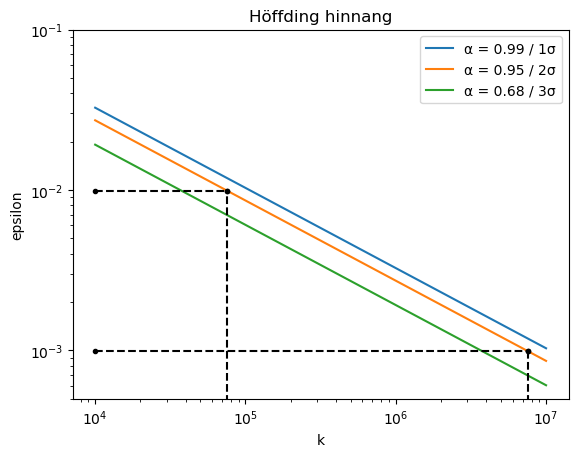

In [2]:
k = np.logspace(4, 7, num=100)
alpha = np.array([0.99, 0.95, 0.68])
epsilon_höffding = np.array([np.sqrt(- np.log((1 - a) / 2) * (2 / k)) for a in alpha])

for e in epsilon_höffding:
    plt.plot(k, e)

# epsilon = 1%
i = np.argmin(np.abs(epsilon_höffding[1] - 0.01))
plt.plot([k[0], k[i]], [epsilon_höffding[1][i], epsilon_höffding[1][i]], '.k--')
plt.plot([k[i], k[i]], [0, epsilon_höffding[1][i]], '.k--')

# epsilon = 0.1%
i = np.argmin(np.abs(epsilon_höffding[1] - 0.001))
plt.plot([k[0], k[i]], [epsilon_höffding[1][i], epsilon_höffding[1][i]], '.k--')
plt.plot([k[i], k[i]], [0, epsilon_höffding[1][i]], '.k--')

plt.title('Höffding hinnang')

plt.legend([f'α = {a} / {i + 1}σ' for i, a in enumerate(alpha)])

plt.xlabel('k')
plt.xscale('log')
plt.xticks(np.logspace(4, 7, num=4))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabel/dataframe

### Binoom

Kuna $X_i \in \{ -1 , 1 \}$ defineerime sellise $Y_i \in \{ 0 , 1 \}$ järgnevalt $Y_i = \frac{ X_i + 1 }{ 2 }$, siis $\sum_{i = 1}^{k} Y_i \sim Bin(k, p)$, kus

\begin{equation*}
    p = \frac{ 1 }{ k } \sum_{i = 1}^{k} Y_i
\end{equation*}

Kuidas on $p$ seotud $p_A$ ja $p_B$?

\begin{align*}
    \delta & = \frac{ 1 }{ k } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] \\
           & = \frac{ 1 }{ k } \sum_{i = 1}^{ k } X_i \\
           & = \frac{ 1 }{ k } ( 2 \sum_{i = 1}^{ k } Y_i - k )  \\
           & = 2 \frac{ \sum_{i = 1}^{ k } Y_i }{ k } - 1 \\
           & = 2 p - 1
\end{align*}

Millest järeldub, et $p = \frac{ 1 }{ 2 } + \frac{ k }{ n } \frac{ p_A - p_B }{ 2 }$

$\dots$

Valim suurusega $k_0$

\begin{equation*}
    \hat{s} := \frac{ 1 }{ k_0 } \sum_{ \hat{y}_i \neq \hat{z}_i } [\hat{y}_i = y_i] - [\hat{z}_i = y_i] = \frac{ 1 }{ k_0 } \sum_{ i = 1 }^{ k_0 } Y_i \\
\end{equation*}

Kuna $\sum_{i = 1}^{ k_0 } Y_i \sim Bin( k_0 , p )$

\begin{equation*}
    k_0 \hat{s} \sim Bin( k_0 , p )
\end{equation*}

\begin{equation*}
    P ( \mid \frac{ \hat{s} - \delta }{ \delta } \mid \geq \varepsilon ) \leq 0.05 \iff P ( k_0 \hat{ s } \leq k_0 \delta (1 - \varepsilon) ) \leq 0.025
\end{equation*}

Olgu $q$ $2.5%$ protsendipunkt, siis $\varepsilon = 1 - \frac{ q }{ k_0 \delta }$

\begin{equation*}
    \frac{ ( \hat{s} + 1 ) \ell }{ 2 } \sim Bin( \ell , p )
\end{equation*}

siin $q = 100 - 2.5$ protsendipunkt
\begin{equation*}
    \varepsilon_1 = \frac{ 2 q }{ \ell \delta } - \frac{ 1 }{ \delta } - 1
\end{equation*}

siin $q = 2.5$ protsendipunkt
\begin{equation*}
    \varepsilon_2 = 1 + \frac{ 1 }{ \delta } - \frac{ 2 q }{ \ell \delta }
\end{equation*}

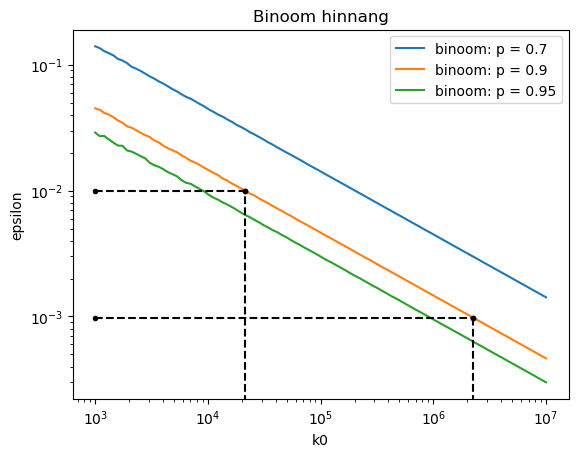

In [5]:
k0 = np.logspace(3, 7, num=100)
tõenäosused = np.array([0.7, 0.9, 0.95])

#epsilon_binoom = np.array([1 - binom.ppf(q=0.025, p=p, n=k0) / (k0 * 2 * p - k0) for p in tõenäosused])
epsilon_binoom = np.array([(2 * binom.ppf(q=(1 - 0.025), p=p, n=k0)) / (k0 * (2 * p - 1)) - 1 / (2 * p - 1) - 1 for p in tõenäosused])

for e in epsilon_binoom:
    plt.plot(k0, e)

# epsilon = 1%
i = np.argmin(np.abs(epsilon_binoom[1] - 0.01))
plt.plot([k0[0], k0[i]], [epsilon_binoom[1][i], epsilon_binoom[1][i]], '.k--')
plt.plot([k0[i], k0[i]], [0, epsilon_binoom[1][i]], '.k--')

# epsilon = 0.1%
i = np.argmin(np.abs(epsilon_binoom[1] - 0.001))
plt.plot([k0[0], k0[i]], [epsilon_binoom[1][i], epsilon_binoom[1][i]], '.k--')
plt.plot([k0[i], k0[i]], [0, epsilon_binoom[1][i]], '.k--')

plt.title('Binoom hinnang')

plt.legend([f'binoom: p = {p}' for p in tõenäosused])

plt.xlabel('k0')
plt.xscale('log')
plt.xticks(np.logspace(3, 7, num=5))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabel/dataframe